<a href="https://www.kaggle.com/code/julianacorts/ecommerce-customers-ml-regression-slr-mlr?scriptVersionId=135864008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

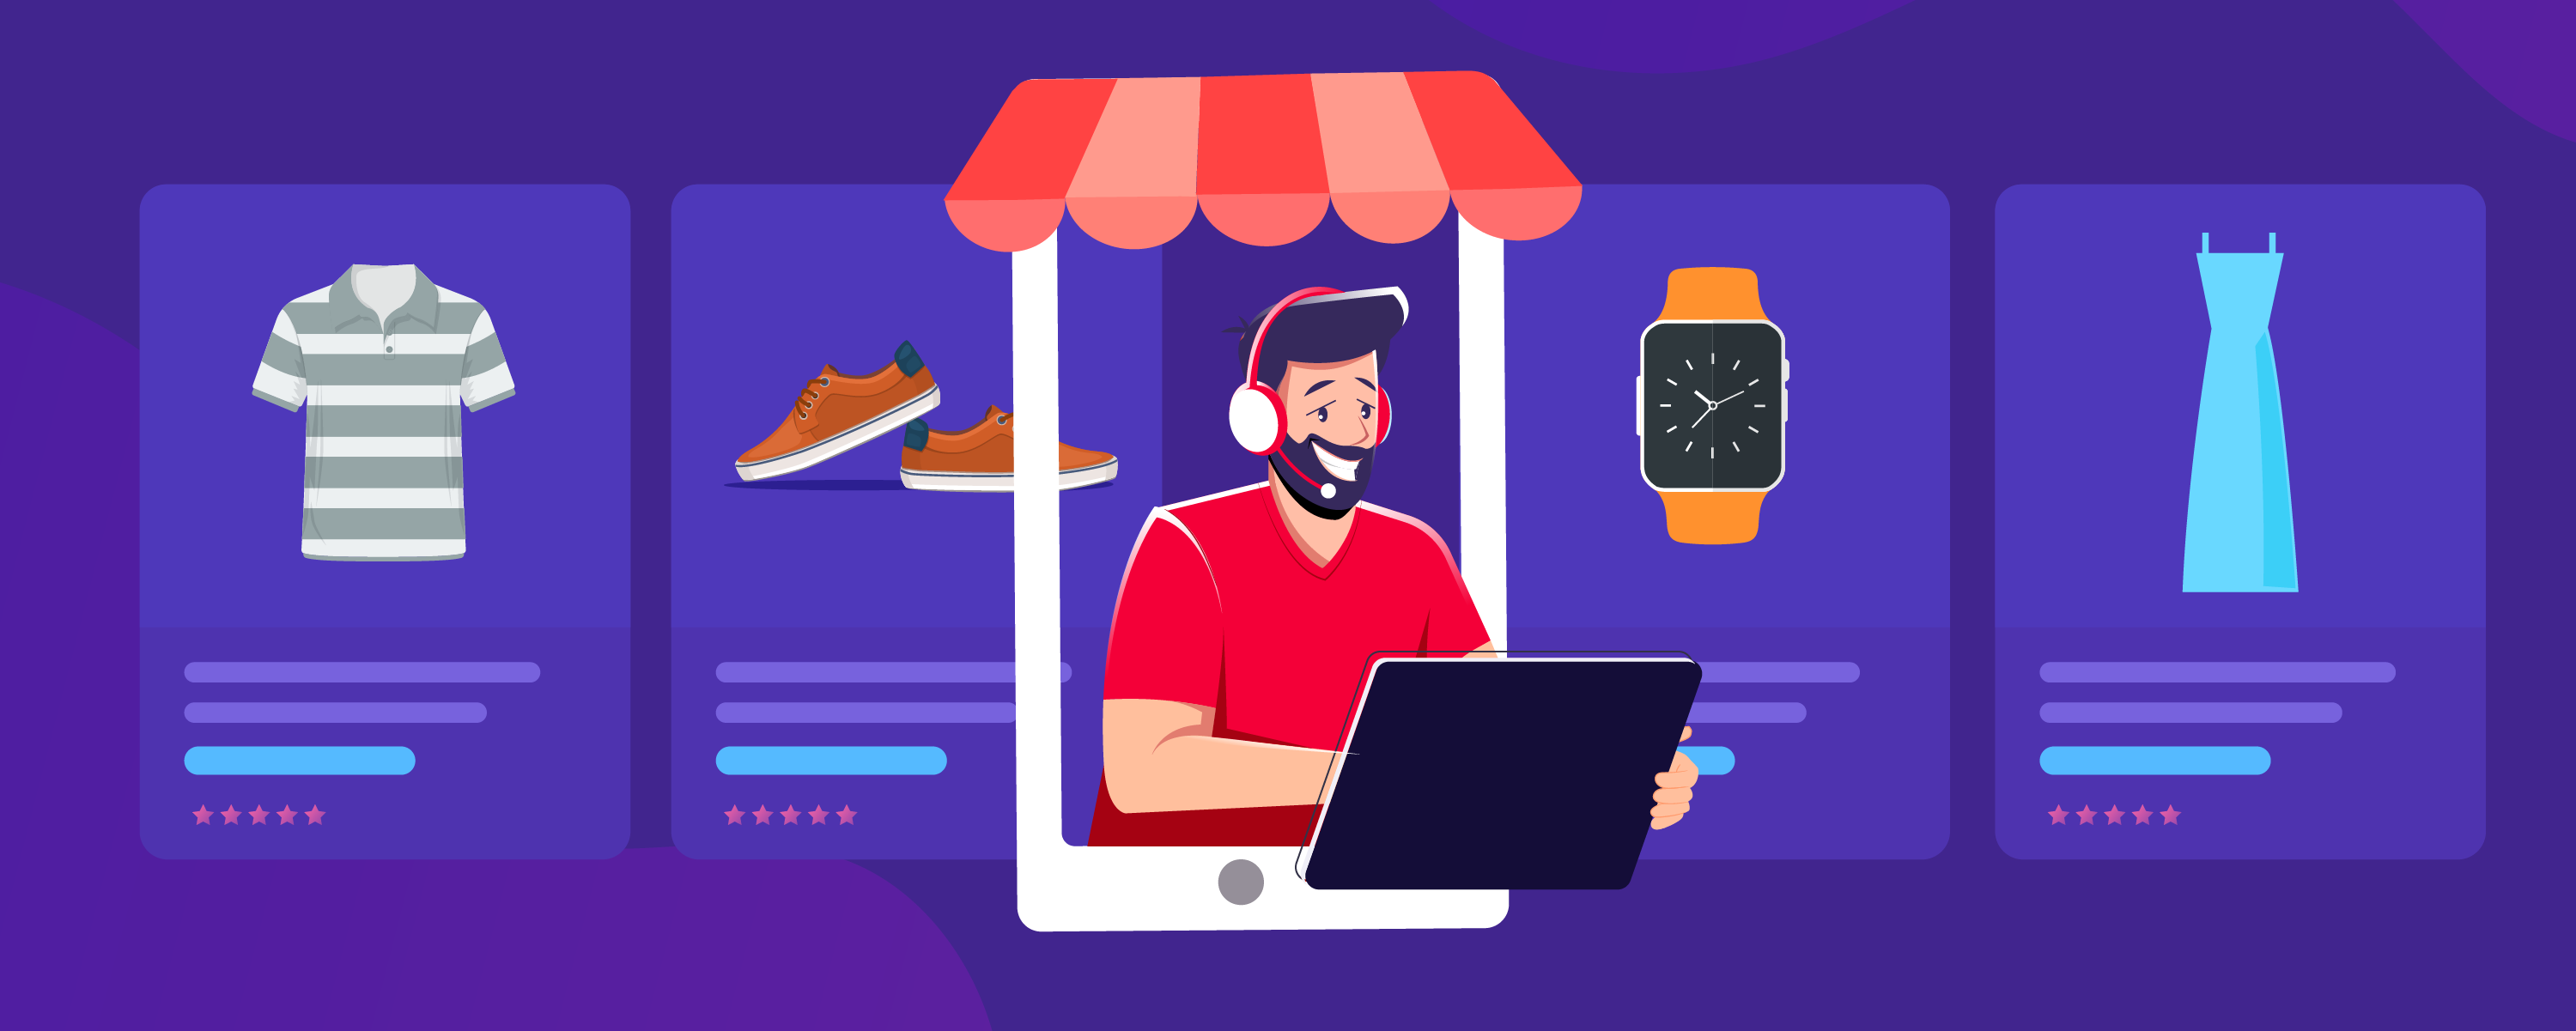

# Abstract

Congratulations! You have just landed a job contract with a major e-commerce company based in New York City. This company sells clothing online, but they also have style advice sessions and physical clothing in the store. Customers come to the store, have sessions/meetings with a personal stylist, then can go home and order the clothes they want on a mobile app or website.

The company is trying to decide whether to focus their efforts on their mobile app experience or on their website. They've hired you to help them figure it out! Let us begin!

# Dataset description

**There are 8 variables in this data set:**

3 categorical variables and 5 continuous variables.

**The feature sets are:**

* Email -> Customers Email
* Address -> Customers Address
* Avatar -> Colored Avatar
* Avg. Session Length -> Average length of in-store style advice sessions
* Time on App -> Average time spent on the application in minutes
* Time on Website -> Average time spent on the website in minutes
* Length of Membership -> Years the client has been a member
* Yearly Amount Spent -> Yearly Amount Spent by the customer

# Objetives

For the development of the notebook we will use a predictive technique through supervised learning for data analysis. This regression algorithm will be carried out using the simple linear regression and multiple linear regression techniques.

* Develop a regression analysis using the simple linear regression model.
* Develop a regression analysis using the multiple linear regression model.
* Exploration of data sets using various types of data visualization.
* Implement the CRISP-DM methodology used in analytical projects.
* Respond to the company's problems.

# Exploratory Data Analysis

# 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from plotly import express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as pyplot

#to prevent Plotly from giving blank visualizations
from plotly.offline import plot,iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
df_customers=pd.read_csv('/kaggle/input/ecommerce-customers/Ecommerce Customers.csv')

# 2. Data exploration

### 2.1 Data preview

In [3]:
#view some data from the dataset
df_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#to know how many records and columns do we have --> 500 records, 8 columns
df_customers.shape

(500, 8)

### 2.2 Data types

In [5]:
df_customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

### 2.3 Null and NaN Data

In [6]:
#to know the null data on the dataset
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df_customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
df_customers.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

We have no null, invalid or missing values

### 2.4 Duplicate values

In [9]:
print(df_customers.duplicated())
print("Duplicate values:",df_customers.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool
Duplicate values: 0


We dont have duplicate values

# 3. Statistics visualization and relations between the data

In [10]:
#to know some statistics of all the data on the dataset, including numerical and categorical data
df_customers.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email,500,500,mstephenson@fernandez.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avatar,500,138,SlateBlue,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Session Length,500.0,NaN,NaN,NaN,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,NaN,NaN,NaN,12.052488,0.994216,8.508152,11.388153,11.983231,12.75385,15.126994
Time on Website,500.0,NaN,NaN,NaN,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,NaN,NaN,NaN,3.533462,0.999278,0.269901,2.93045,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,NaN,NaN,NaN,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


<module 'matplotlib' from '/opt/conda/lib/python3.10/site-packages/matplotlib/__init__.py'>


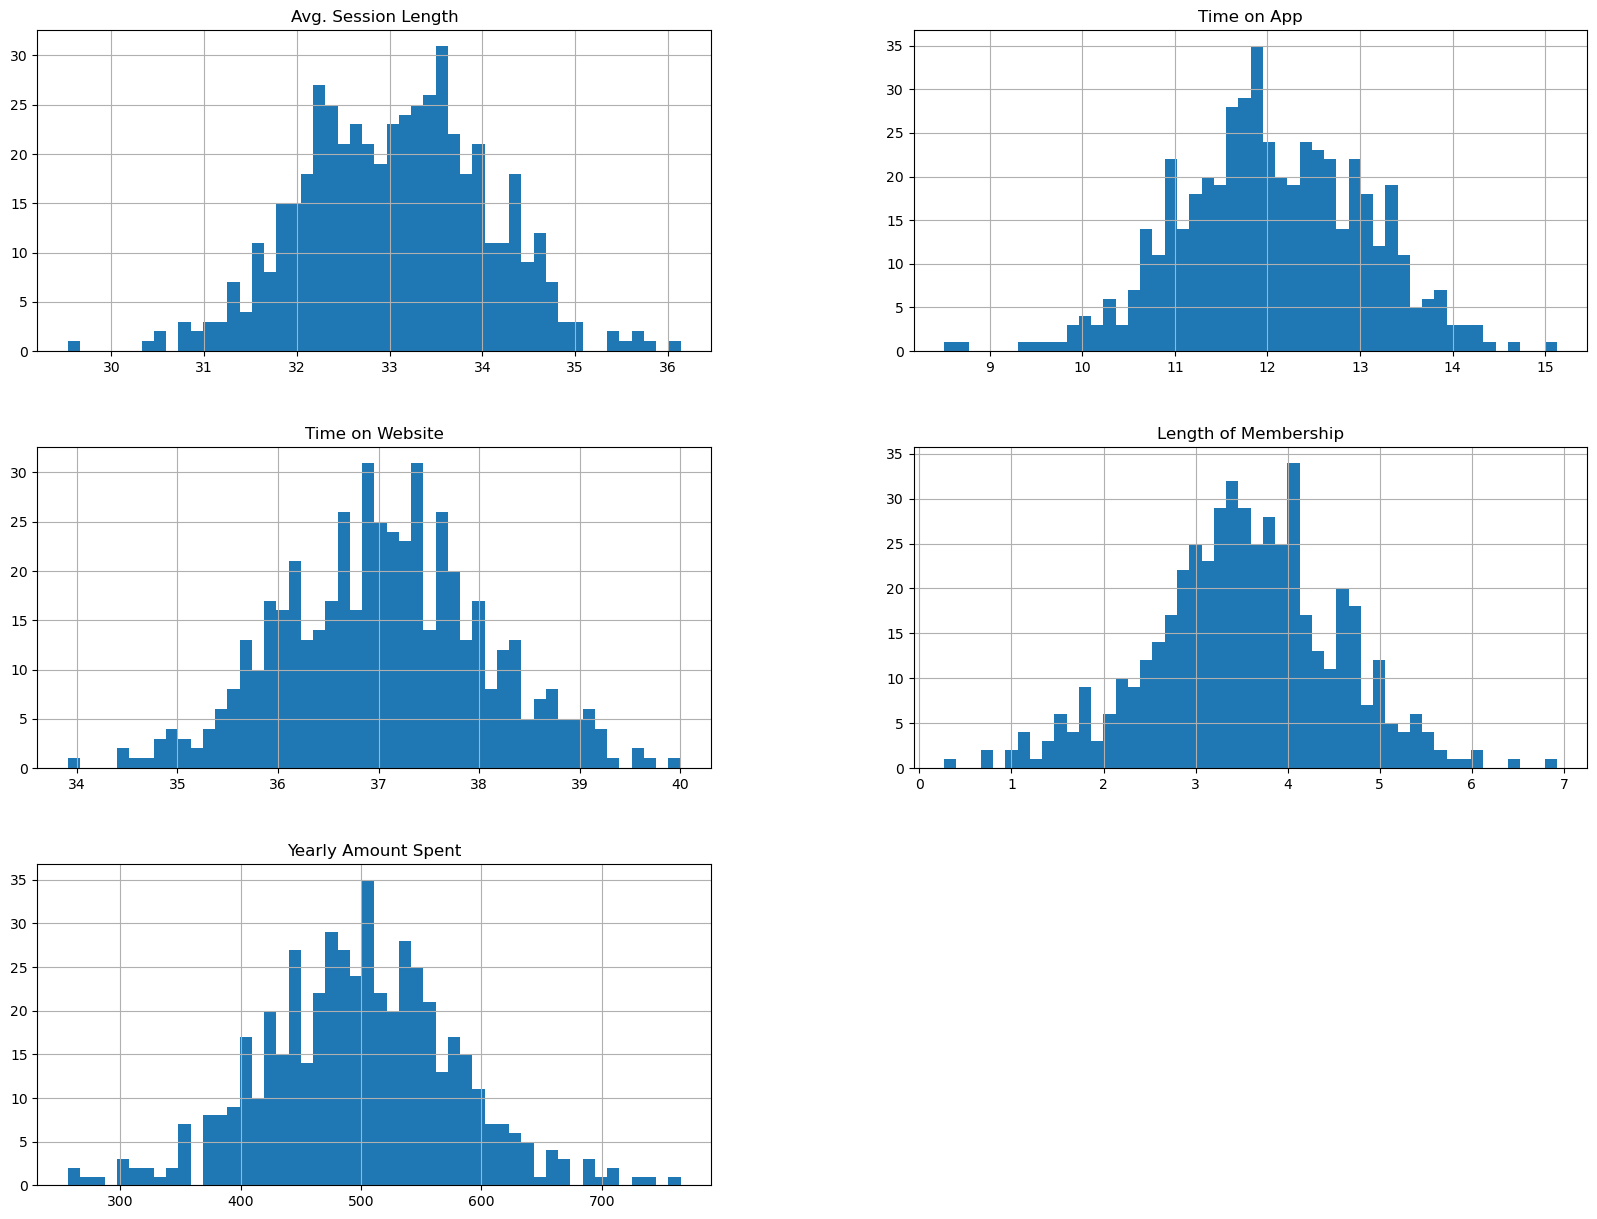

In [11]:
#Univariate Analysis
df_customers.hist(bins=50, figsize=(20,15))
print(plt)

### 3.1 Correlation

**Question from the organization:** Is it better to focus efforts on improving care through the mobile application or the website?

To answer this business question, it is essential to focus on which of these two customer service channels has generated the most sales. For this reason, it is important to find out which variable has the highest correlation with the Yearly Amount Spent.

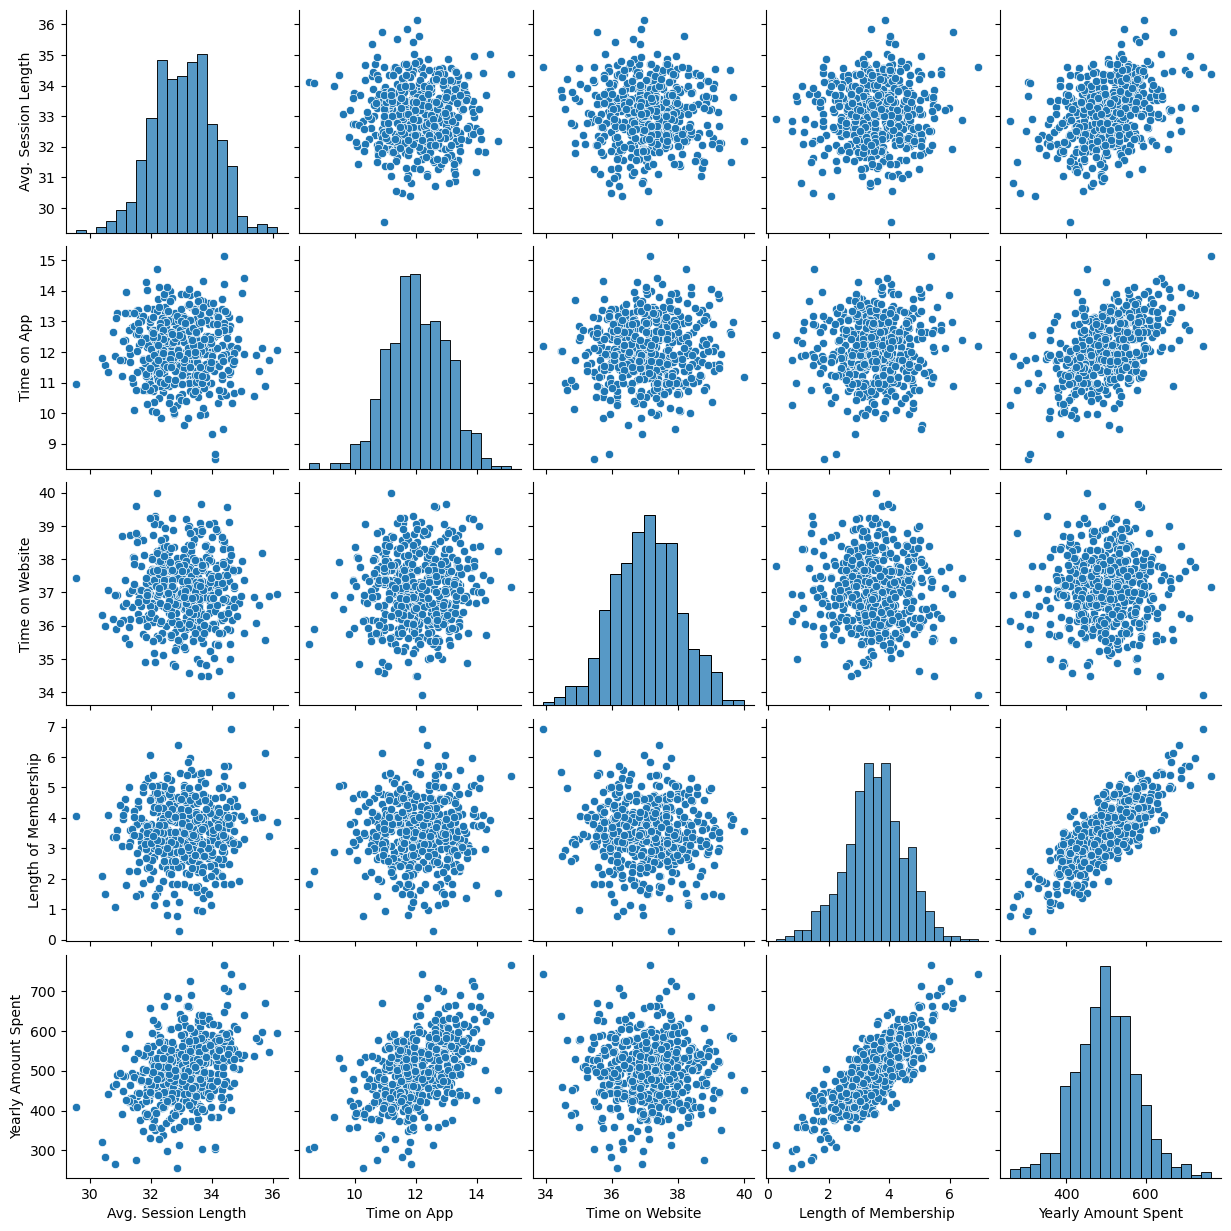

In [12]:
#to know the correlation of all the numeric variables in the dataset
sns.pairplot(df_customers)

* The variable that seems most correlated with Yearly Amount Spent is: Length of Membership

/tmp/ipykernel_20/3682023428.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

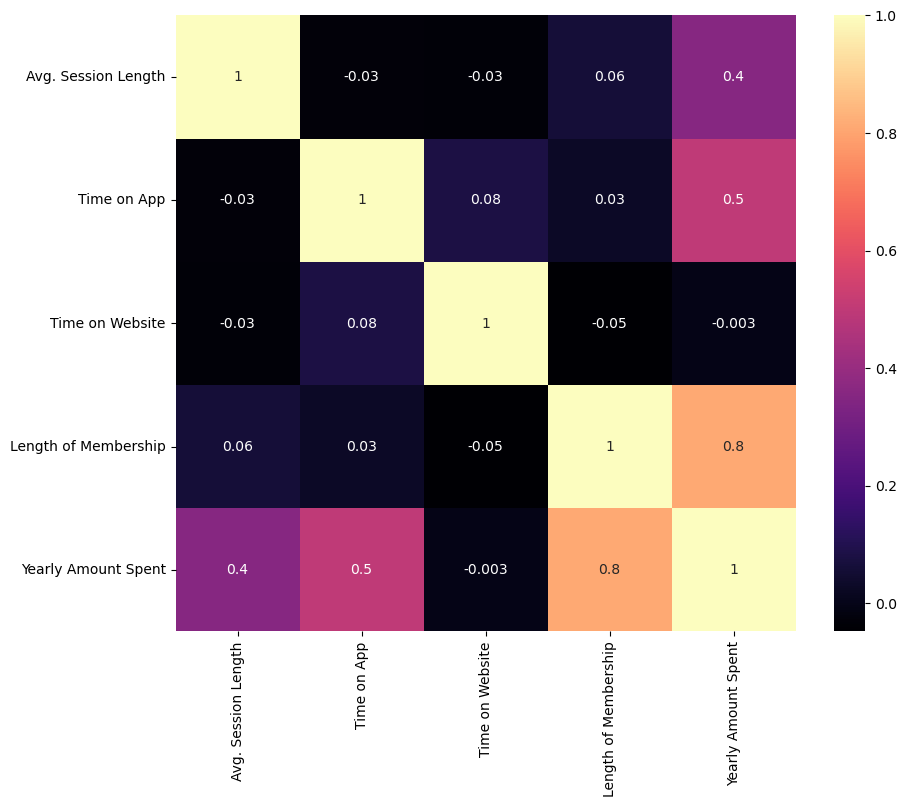

In [13]:
f, ax = pyplot.subplots(figsize=(10, 8))
sns.heatmap(df_customers.corr(),annot = True,fmt='.1g',ax=ax, cmap='magma')

* Length of Membership is the variable most correlated with Yearly Amount Spent, with 0.8
* Time on App is the secound variable most correlated with Yearly Amount Spent, with 0.5. 

If it is compared with the time on the website, it can be seen that it does not reflect a positive correlation, that is, that customers spend more time on the website does not necessarily mean that it is reflected in purchases. This could give a first hypothesis that the company should invest in the mobile application, but it is equally important to run the models to give a final decision.

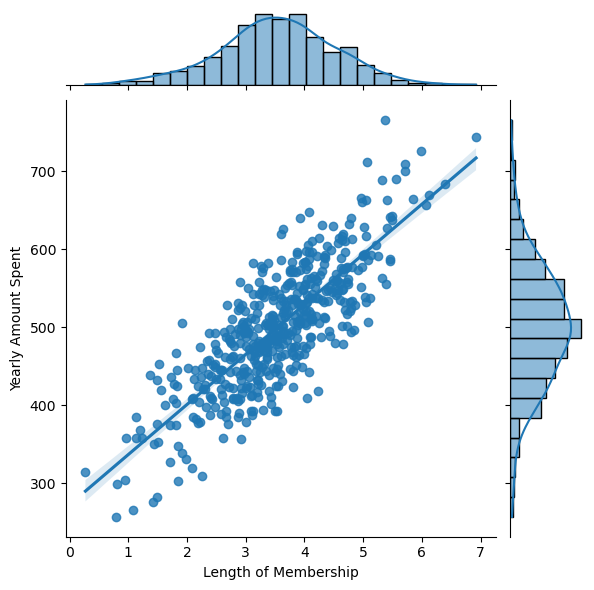

In [14]:
sns.jointplot(data = df_customers , x = 'Length of Membership' , y = 'Yearly Amount Spent', kind="reg")

* The histograms reflect a symmetric normal distribution for both variables.
* The relationship between the annual amount spent and the duration of the affiliation seems positive. This means that the longer customers have their membership active, the greater their annual amount spent.

# 4. Simple Linear Regression

To develop this model, the Length of Membership variable (with which the highest correlation was found) is selected to try to predict the Yearly Amount Spent variable.

### 4.1 Define the the dataset

In [15]:
df_SLR=df_customers[['Length of Membership','Yearly Amount Spent']]

### 4.2 Split the dataset into Training and Test

In [16]:
#Let's split our dataset into training and test sets.
#70% of the entire dataset will be used for training and 30% for testing.
msk = np.random.rand(len(df_SLR)) < 0.7
train = df_SLR[msk]
test = df_SLR[~msk]

#to be able to see the shape of the shuffle sets for training and test.
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (345, 2)
test shape: (155, 2)


### 4.3 Training the simple linear regression

In [17]:
from sklearn import linear_model

#Create the linear regression object
regr=linear_model.LinearRegression()

#Separate the variables from the training set
train_x=np.asanyarray(train[['Length of Membership']])
train_y=np.asanyarray(train[['Yearly Amount Spent']])

#Train the model using the training sets
regr.fit(train_x, train_y)

#The coefficients
print ('Coefficient: ', regr.coef_)
print ('Interception: ',regr.intercept_)

Coefficient:  [[64.42283128]]
Interception:  [273.69638713]


### 4.4 Test and Evaluation the simple linear regression

In [18]:
import sklearn.metrics as metrics

test_x = np.asanyarray(test[['Length of Membership']])
test_y = np.asanyarray(test[['Yearly Amount Spent']])

predictions = regr.predict(test_x)

print()
print('MAE: {}'.format(metrics.mean_absolute_error(test_y, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(test_y, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, predictions))))


MAE: 36.57802207447945
MSE: 2187.3659963141044
RMSE: 46.76928475307383


Text(0.5, 0, 'Y test')

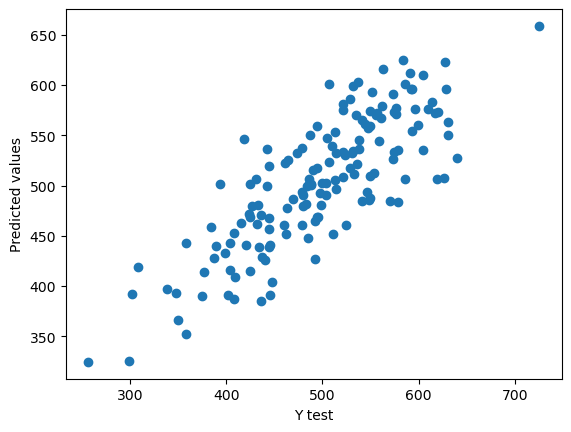

In [19]:
#scatter plot of actual test values vs. predicted values
plt.pyplot.scatter(test_y, predictions)
plt.pyplot.ylabel('Predicted values')
plt.pyplot.xlabel('Y test')

# 5. Multiple Linear Regression

To develop this model, the four variables will be used to try to predict the variable Yearly Amount Spent.

### 5.1 Define the the dataset

In [20]:
df_MLR=df_customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership','Yearly Amount Spent']]

### 5.2 Split the dataset into Training and Test

In [21]:
#Let's split our dataset into training and test sets.
#70% of the entire dataset will be used for training and 30% for testing.
msk=np.random.rand(len(df_customers)) < 0.7
train=df_MLR[msk]
test=df_MLR[~msk]

#to be able to see the shape of the shuffle sets for training and test.
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (342, 5)
test shape: (158, 5)


### 5.3 Training the Multiple linear regression

In [22]:
from sklearn import linear_model

#Create the linear regression object
regr=linear_model.LinearRegression()

#Separate the variables from the training set
x=np.asanyarray(train[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
y=np.asanyarray(train[['Yearly Amount Spent']])

#Train the model using the training sets
regr.fit (x, y)

#The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[26.3097827  39.19447071  0.56618022 61.4544904 ]]


### 5.4 Test and Evaluation the Multiple linear regression

In [23]:
test_x = np.asanyarray(test[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
test_y = np.asanyarray(test[['Yearly Amount Spent']])

predictions = regr.predict(test_x)

print('MAE: {}'.format(metrics.mean_absolute_error(test_y, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(test_y, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, predictions))))

MAE: 7.770123983976076
MSE: 95.82808099530972
RMSE: 9.789181834827144


Text(0.5, 0, 'Y test')

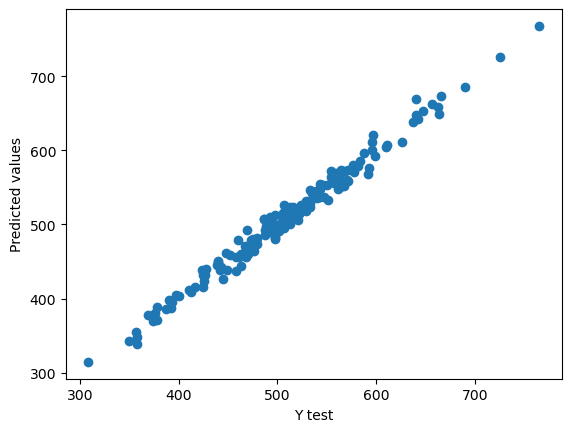

In [24]:
#scatter plot of actual test values vs. predicted values
plt.pyplot.scatter(test_y, predictions)
plt.pyplot.ylabel('Predicted values')
plt.pyplot.xlabel('Y test')

# 6. Conclusions

In [25]:
df_coeffecients=df_customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
pd.DataFrame(regr.coef_[0], df_coeffecients.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,26.309783
Time on App,39.194471
Time on Website,0.566180
Length of Membership,61.454490


* The higher the value of the coefficient, the more related it is to the target variable, in this case, the Yearly Amount Spent.

### **Do you think the company should focus more on its mobile app or its website?**

The company must focus on the mobile application, because we can see that the coefficient of Time on App is greater than that of Time on Website, confirming the hypothesis that had been raised previously when the correlation was evaluated.

Inspired by:

https://www.kaggle.com/code/pouyaaskari/ecommerce-customers-linearregression

https://www.kaggle.com/code/mohamedaminesoltani/ecommerce-time-spending-eda-linear-regression

I'm still learning, any suggestions or comments to improve will be appreciated! If you liked it and have any recommendations for other datasets I should look at, let me know in the comments ! Thanks for the support! :)

**Connect with me:** https://www.linkedin.com/in/julianacortesarboleda/